# Stair detection

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Reading images and detecting edges

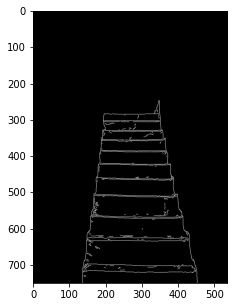

In [2]:
img = cv.imread("stair.png")
blur = cv.GaussianBlur(img, (3,3), 0)
grey = cv.cvtColor(blur, cv.COLOR_BGR2GRAY)
edge = cv.Canny(grey, 100, 150, apertureSize=3)

plt.figure(figsize=(10,5))
plt.imshow(cv.cvtColor(edge, cv.COLOR_BGR2RGB))

### Fitting lines to edges

In [3]:
lines = cv.HoughLines(edge, 1, np.pi/180, 110)
print(lines.shape)
print(lines)

(27, 1, 2)
[[[ 6.3300000e+02  1.5707964e+00]]

 [[ 3.0200000e+02  1.5707964e+00]]

 [[ 6.9500000e+02  1.5882496e+00]]

 [[ 4.2200000e+02  1.5707964e+00]]

 [[ 3.2900000e+02  1.5707964e+00]]

 [[ 6.2500000e+02  1.5707964e+00]]

 [[ 4.1600000e+02  1.5882496e+00]]

 [[ 2.3700000e+02  1.3962634e-01]]

 [[ 5.7100000e+02  1.5707964e+00]]

 [[ 7.0900000e+02  1.6057029e+00]]

 [[ 5.6800000e+02  1.5707964e+00]]

 [[ 5.0100000e+02  1.6057029e+00]]

 [[ 2.4600000e+02  1.5707964e-01]]

 [[ 2.3100000e+02  1.2217305e-01]]

 [[ 4.5900000e+02  1.5882496e+00]]

 [[ 3.5000000e+02  1.5882496e+00]]

 [[ 4.5700000e+02  1.5882496e+00]]

 [[ 3.8500000e+02  1.5707964e+00]]

 [[ 6.2800000e+02  1.5882496e+00]]

 [[ 4.6200000e+02  1.5707964e+00]]

 [[ 5.0600000e+02  1.5882496e+00]]

 [[ 6.9100000e+02  1.6057029e+00]]

 [[ 5.6200000e+02  1.5882496e+00]]

 [[ 3.0500000e+02  1.5707964e+00]]

 [[-2.7200000e+02  2.9146998e+00]]

 [[ 7.0200000e+02  1.5707964e+00]]

 [[ 5.0300000e+02  1.5882496e+00]]]


### View lines

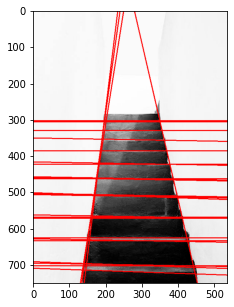

In [4]:
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
    x1 = int(x0 + 1000 * (-b))
    # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
    y1 = int(y0 + 1000 * (a))
    # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
    x2 = int(x0 - 1000 * (-b))
    # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
    y2 = int(y0 - 1000 * (a))
    
    cv.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)    


plt.figure(figsize=(10,5))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))